In [4]:
import os
import numpy as np
from matplotlib import pyplot as plt

import qcodes as qc
from silq.analysis import fit_toolbox
qc.data.data_set.DataSet.default_io.base_location = 'E:\EWJN\data'
loc_provider = qc.data.location.FormatLocation(fmt='{date}/#{counter}_{name}_{time}')
qc.data.data_set.DataSet.location_provider=loc_provider
%matplotlib notebook

<IPython.core.display.Javascript object>


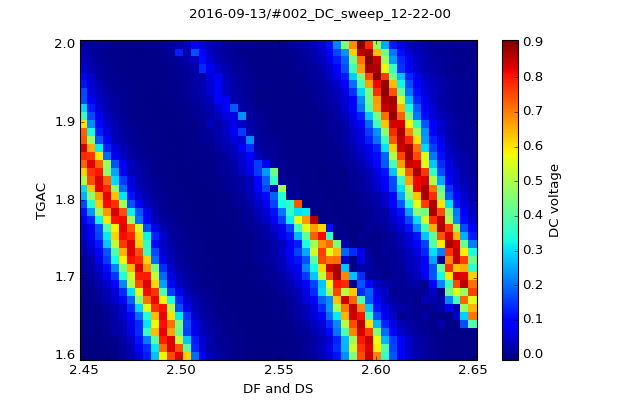

In [5]:
data = qc.load_data('2016-09-13/#002_DC_sweep_12-22-00')
plotQ = qc.MatPlot(data.DC_voltage)

<IPython.core.display.Javascript object>


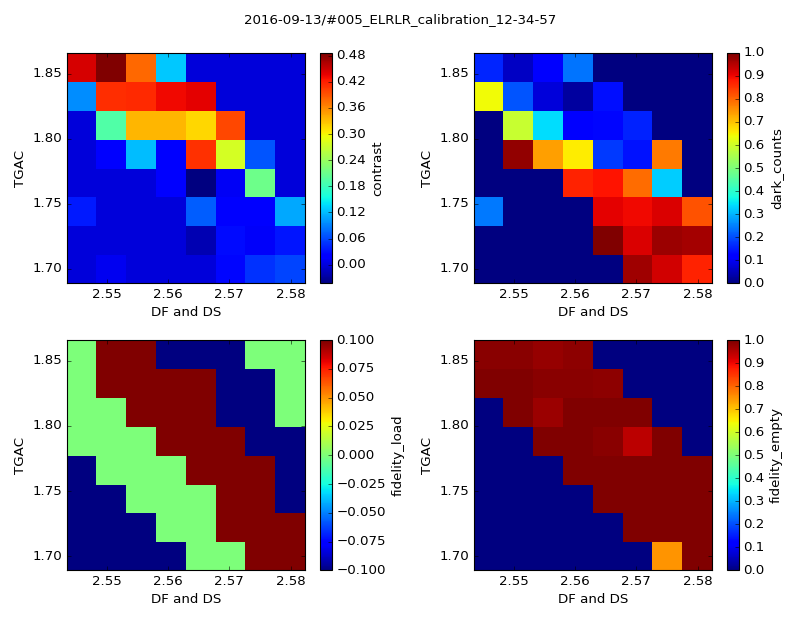

In [3]:
data = qc.load_data('2016-09-13/#005_ELRLR_calibration_12-34-57')

plot = qc.MatPlot(subplots=(2,2), figsize=(10,8))
plot.add(data.contrast, subplot=1, nticks=6)
plot.add(data.dark_counts, subplot=2, nticks=6)
plot.add(data.fidelity_load, subplot=3, nticks=6)
plot.add(data.fidelity_empty, subplot=4, nticks=6)
plot.fig.tight_layout(rect=[0, 0.03, 1, 0.95])

<IPython.core.display.Javascript object>


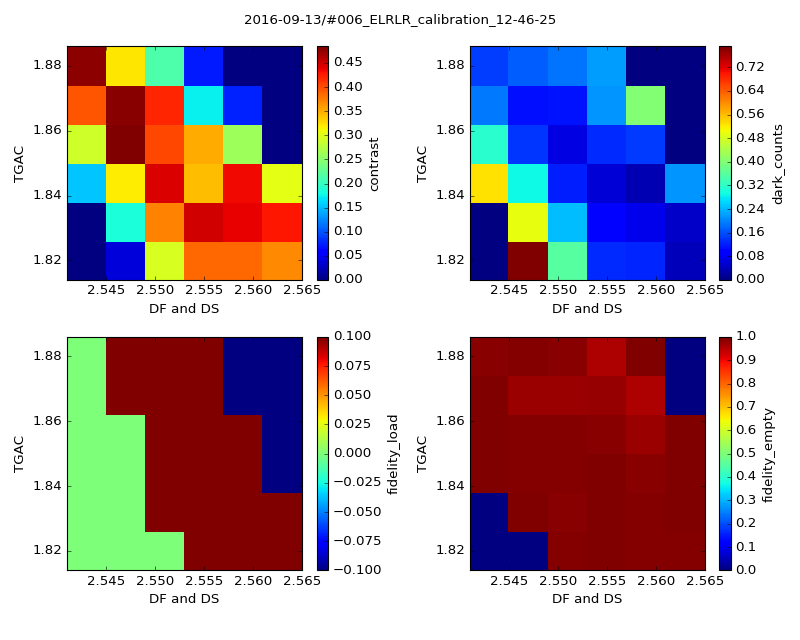

In [5]:
data = qc.load_data('2016-09-13/#006_ELRLR_calibration_12-46-25')

plot = qc.MatPlot(subplots=(2,2), figsize=(10,8))
plot.add(data.contrast, subplot=1, nticks=6)
plot.add(data.dark_counts, subplot=2, nticks=6)
plot.add(data.fidelity_load, subplot=3, nticks=6)
plot.add(data.fidelity_empty, subplot=4, nticks=6)
plot.fig.tight_layout(rect=[0, 0.03, 1, 0.95])

<IPython.core.display.Javascript object>


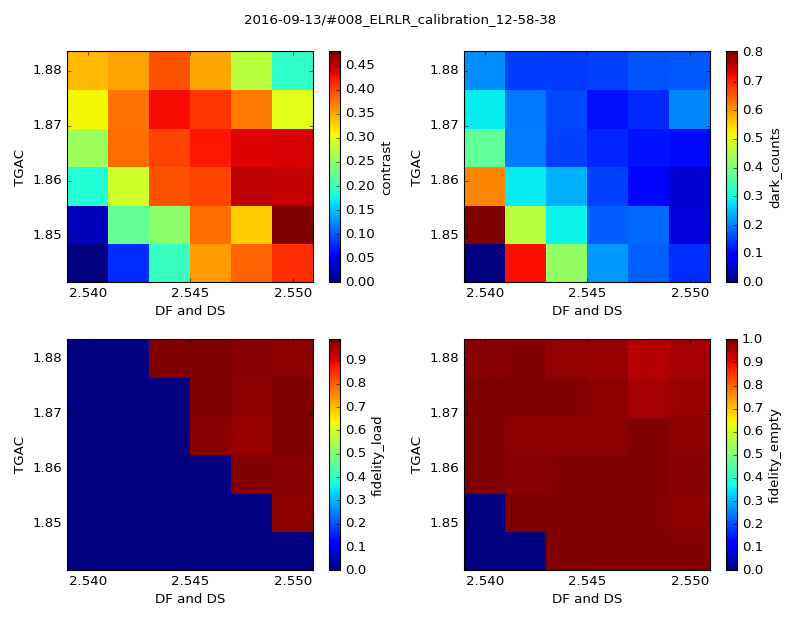

In [6]:
data = qc.load_data('2016-09-13/#008_ELRLR_calibration_12-58-38')

plot = qc.MatPlot(subplots=(2,2), figsize=(10,8))
plot.add(data.contrast, subplot=1, nticks=6)
plot.add(data.dark_counts, subplot=2, nticks=6)
plot.add(data.fidelity_load, subplot=3, nticks=6)
plot.add(data.fidelity_empty, subplot=4, nticks=6)
plot.fig.tight_layout(rect=[0, 0.03, 1, 0.95])

operating point:
    
TGAC(1.856)
DF_DS(2.553)

fidelity_empty: 0.987
fidelity_load: 0.972
fidelity_read: 0.718
up_proportion: 0.547
dark_counts: 0.058
contrast: 0.490

Number of successful sweeps: 17


<IPython.core.display.Javascript object>


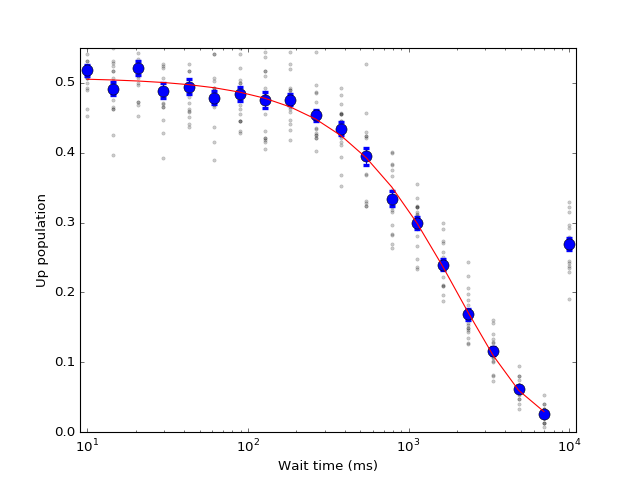

T1 time: 2064 ms
[[Model]]
    Model(fit_function)
[[Fit Statistics]]
    # function evals   = 19
    # data points      = 19
    # variables        = 3
    chi-square         = 0.002
    reduced chi-square = 0.000
    Akaike info crit   = -171.915
    Bayesian info crit = -169.082
[[Variables]]
    tau:         2063.86504 +/- 110.0443 (5.33%) (init= 2321.335)
    amplitude:   0.49559605 +/- 0.010329 (2.08%) (init= 0.4917659)
    offset:      0.01206822 +/- 0.010665 (88.38%) (init= 0.02552703)
[[Correlations]] (unreported correlations are <  0.100)
    C(amplitude, offset)         = -0.945 
    C(tau, offset)               = -0.850 
    C(tau, amplitude)            =  0.721 



In [9]:
data = qc.load_data('2016-09-13/#010_T1_data_13-46-56')
T1_wait_times = data.T1_wait_time_set[0]
T1_wait_times_sorted = np.sort(T1_wait_times)
idx_sorted = np.argsort(T1_wait_times)

max_idx = np.argmin([~np.isnan(np.sum(datarow)) for datarow in data.up_proportion_3_0_0])
print('Number of successful sweeps: {}'.format(max_idx))
vals = data.up_proportion_3_0_0[:max_idx]
vals_sorted = vals[:,idx_sorted]
vals_mean_sorted = np.mean(vals_sorted,axis=0)
vals_std_sorted = np.std(vals_sorted,axis=0)
vals_std_mean_sorted = vals_std_sorted/np.sqrt(max_idx)


fig = plt.figure()
ax = fig.gca()
for datarow in vals_sorted:
    ax.plot(T1_wait_times_sorted, datarow, 'ok', ms=3, alpha=0.2)
(_, caps, _) = ax.errorbar(T1_wait_times_sorted, vals_mean_sorted, yerr=vals_std_mean_sorted, 
                           marker='o', linestyle='',ms=10)
for cap in caps:
    cap.set_markeredgewidth(3)
    
# Fitting 
mod = fit_toolbox.ExponentialFit()
result=mod.perform_fit(T1_wait_times_sorted[:-1],vals_mean_sorted[:-1])#, weights=1/np.power(vals_std_mean_sorted,2))
print('T1 time: {:.0f} ms'.format(result.best_values['tau']))
plt.plot(T1_wait_times_sorted[:-1], result.best_fit, 'r-')

ax.set_xscale("log")
ax.set_xlim([0.9*T1_wait_times_sorted[0], 1.1*T1_wait_times_sorted[-1]])
ax.set_ylim([0, 0.55])

ax.set_xlabel('Wait time (ms)')
ax.set_ylabel('Up population')
print(result.fit_report())

<IPython.core.display.Javascript object>


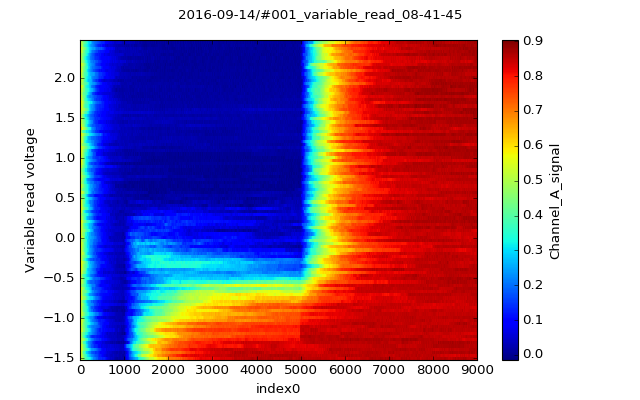

In [3]:
data = qc.load_data('2016-09-14/#001_variable_read_08-41-45')

plot = qc.MatPlot()
plot.add(data.Channel_A_signal)#, decimation=[100,1])